In [50]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
cd drive/MyDrive/Colab\ Notebooks/cp2/ml-100k

[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks/cp2/ml-100k'
/content/drive/MyDrive/Colab Notebooks/cp2/ml-100k


In [18]:
# 파일들을 프린트합니다
from glob import glob
for filename in glob('*'):
    print(filename)

u.genre
u.occupation
u.user
u.item
u.info
u.data


In [19]:
# 각 파일의 shape, head를 출력하는 함수
from IPython.display import display
import pandas as pd


# 다양하게 나눠진 테이블
# 따라서 merge의 기능이 중요해진다.
def preview():
    for filename in glob('*'):
        df = pd.read_csv(filename, encoding='ISO-8859-1', error_bad_lines=False)
        print(filename, df.shape)
        display(df.head())
        print('\n')

In [20]:
preview()

u.genre (18, 1)


<ipython-input-19-d4e79ee6ef22>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(filename, encoding='ISO-8859-1', error_bad_lines=False)


,unknown|0
0,Action|1
1,Adventure|2
2,Animation|3
3,Children's|4
4,Comedy|5




u.occupation (20, 1)


<ipython-input-19-d4e79ee6ef22>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(filename, encoding='ISO-8859-1', error_bad_lines=False)


,administrator
0,artist
1,doctor
2,educator
3,engineer
4,entertainment




u.user (942, 1)


<ipython-input-19-d4e79ee6ef22>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(filename, encoding='ISO-8859-1', error_bad_lines=False)


,1|24|M|technician|85711
0,2|53|F|other|94043
1,3|23|M|writer|32067
2,4|24|M|technician|43537
3,5|33|F|other|15213
4,6|42|M|executive|98101




u.item (1266, 1)


<ipython-input-19-d4e79ee6ef22>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(filename, encoding='ISO-8859-1', error_bad_lines=False)
b'Skipping line 12: expected 1 fields, saw 3\nSkipping line 14: expected 1 fields, saw 3\nSkipping line 18: expected 1 fields, saw 2\nSkipping line 25: expected 1 fields, saw 3\nSkipping line 26: expected 1 fields, saw 3\nSkipping line 34: expected 1 fields, saw 3\nSkipping line 38: expected 1 fields, saw 3\nSkipping line 40: expected 1 fields, saw 3\nSkipping line 52: expected 1 fields, saw 3\nSkipping line 55: expected 1 fields, saw 2\nSkipping line 63: expected 1 fields, saw 3\nSkipping line 64: expected 1 fields, saw 3\nSkipping line 68: expected 1 fields, saw 3\nSkipping line 71: expected 1 fields, saw 3\nSkipping line 72: expected 1 fields, saw 3\nSkipping line 77: expected 1 fields, saw 3\nSkipping line 79: expected 1 fields, saw 3\n

,1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0
0,2|GoldenEye (1995)|01-Jan-1995||http://us.imdb...
1,3|Four Rooms (1995)|01-Jan-1995||http://us.imd...
2,4|Get Shorty (1995)|01-Jan-1995||http://us.imd...
3,5|Copycat (1995)|01-Jan-1995||http://us.imdb.c...
4,6|Shanghai Triad (Yao a yao yao dao waipo qiao...




u.info (2, 1)


<ipython-input-19-d4e79ee6ef22>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(filename, encoding='ISO-8859-1', error_bad_lines=False)


,943 users
0,1682 items
1,100000 ratings


<ipython-input-19-d4e79ee6ef22>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(filename, encoding='ISO-8859-1', error_bad_lines=False)




u.data (99999, 1)


,196\t242\t3\t881250949
0,186\t302\t3\t891717742
1,22\t377\t1\t878887116
2,244\t51\t2\t880606923
3,166\t346\t1\t886397596
4,298\t474\t4\t884182806


In [23]:
u_cols =  ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('./u.user', sep='|', names=u_cols, encoding='ISO-8859-1')

usernum = users.shape[0]
print('Number of users:', usernum)

Number of users: 943


In [24]:
users

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [25]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   sex         943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [26]:
# 중복값이 없음을 확인
users.duplicated().sum()

0

In [27]:
users['sex'].value_counts()

M    670
F    273
Name: sex, dtype: int64

([<matplotlib.patches.Wedge at 0x7f5812e22520>,
 [Text(-0.6755578327105941, 0.8681138258681089, ''),
  Text(0.6755577514319091, -0.8681138891183939, '')])

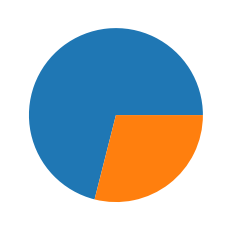

In [90]:
# 성별 파이챠트
plt.pie(users['sex'].value_counts())

In [ ]:
"""
[EDA 및 시각화 예정 - 선영]
1. 성별에 따른 취향 ?
2. 연령에 따른 취향 ?
3. 직업에 따른 취향 ?
4. 추가적인 MetaData를 확인할 수 있는 자료 검색 요망.
5. 추천 시스템에 대한 추가적인 지식 습득 요망.
"""

In [100]:
movie_title = items[['movie_id', 'movie_title']]
movie_title

,movie_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [101]:
df = pd.merge(rating, movie_title, on='movie_id') 

In [103]:
df.head()

,user_id,movie_id,rating,timestamp,movie_title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [104]:
# 영화별 평균 별점 (주의! 1명밖에 관람하지 않은 영화에 (영화를 관림한 그 1명이) 별점을 5점 부여한다면, 5점이 나온다.)
df.groupby('movie_title').mean()['rating'].sort_values(ascending=False)

movie_title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [105]:
# 각 영화는 몇 회씩 관람 되었나요? or 각 영화는 몇 개의 평가가 확인되나요?
df.groupby('movie_title').count()['rating'].sort_values(ascending=False)

movie_title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [106]:
ratings_df = pd.DataFrame(df.groupby('movie_title').mean()['rating'])
ratings_df

,rating
movie_title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [108]:
ratings_df['number of ratings'] = pd.DataFrame(df.groupby('movie_title').count()['rating'])
ratings_df.sort_values(by='rating', ascending=False)

,rating,number of ratings
movie_title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


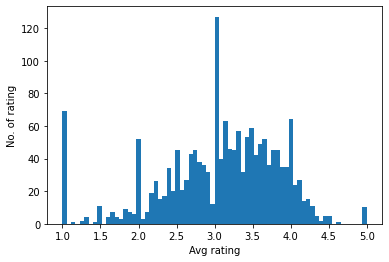

In [111]:
# 별점(ratings)의 분포
plt.hist(ratings_df['rating'], bins=70)
plt.xlabel('Avg rating')
plt.ylabel('No. of rating')
plt.show()

<Axes: xlabel='rating', ylabel='Density'>

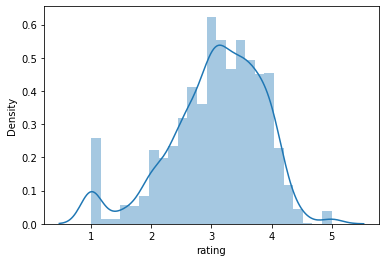

In [113]:
sns.distplot(ratings_df['rating'])

In [29]:
"""
items
"""

'\nitems\n'

In [56]:
#items
i_cols = ['movie_id', 'movie_title' ,'release_date','video_release_date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy','Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

items = pd.read_csv('./u.item', sep='|', names=i_cols, encoding='ISO-8859-1')

n_items = items.shape[0]
print("Number of items:",n_items)

Number of items: 1682


In [57]:
items

,movie_id,movie_title,release_date,video_release_date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   movie_title         1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   IMDb URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [60]:
# video_release_date 컬럼 삭제.
items.drop(columns='video_release_date', axis=1, inplace=True)
items

,movie_id,movie_title,release_date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# 데이터셋의 각 feature는 아래와 같이 볼 수 있고, 기본적인 유저가 영화에 대한 평점을 내린 정보기록임을 알 수 있다.

# userId: 유저의 식별정보. 개별 유저의 id를 의미함 ex. 196번 유저, 186번 유저
# movieId: 영화(아이템)의 식별정보. 개별 영화의 id를 의미함 ex. 242번 영화, 302번 영화
# rating: 유저가 해당 영화를 보고 내린 평점
# timestamp: 유저가 해당 영화를 보고 평점을 내린 시간 정보

In [64]:
r_cols =  ['user_id', 'movie_id', 'rating', 'timestamp']
rating = pd.read_csv('./u.data', sep='\t', names=r_cols, encoding='ISO-8859-1')

rating

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [54]:
len(rating.user_id.unique())

943

In [37]:
rating[rating['user_id']==196]

,user_id,movieid,rating,timestamp
0,196,242,3,881250949
940,196,393,4,881251863
1133,196,381,4,881251728
1812,196,251,3,881251274
1896,196,655,5,881251793
2374,196,67,5,881252017
6910,196,306,4,881251021
7517,196,238,4,881251820
7842,196,663,5,881251911
10017,196,111,4,881251793


In [38]:
"""
Latent Factor Based가 결국 MF다.

SGD, ALS 가장 기본적.


FM 범주형에 대해 원핫으로.


딥러닝 모델도 있다.
NCF
- 시퀀셜 모델
- 그래프 모델 GNN, GCN
"""

'\nLatent Factor Based가 결국 MF다.\n\nSGD, ALS 가장 기본적.\n\n\nFM 범주형에 대해 원핫으로.\n\n\n딥러닝 모델도 있다.\nNCF\n- 시퀀셜 모델\n- 그래프 모델 GNN, GCN\n'

In [39]:
"""
# CB, CF 모델이 가장 보편적.
CB는 평가를 하지 않는다. 유사하기만 해서. 기본적으로는 CF나 다른 것을 같이 쓴다.
콜스스탑? 문제를 해결하기 위해 CB를 사용한다?

CB
컨텐츠(아이템)의 정보를 추출해서 유사한 컨텐츠를 찾아 추천해주는 방식 ex.쿠팡에서 마우스라면 - 마우스
[장점]
Cold Start문제 : 새로운 영화, 본 사람이 아무도 없으면 정보가 없다. 문제를 해결할 수 있다.
인기가 낮은 
왜 이것이 추천이 되었는지 설명을 할 수가 있다.

[단점]
한글데이터는 어려워 벡터화 필요
유사도 기반으로 같은 분야/장르의 상품만 추천 가능.
다른 유저의 데이터 활용 불가능.

무비데이터는 explicit

Memory Based CF
새로운 아이템이 들어오면 유사도 측정이 어려움.
sparse 하다. 0과 Null값이 많을 때.


피어슨 유사도 - 공분산 이용.
편차 가중 평균...


여러 유사도를 넣어서 확인
테스트 또 테스트!
"""

'\n# CB, CF 모델이 가장 보편적.\nCB는 평가를 하지 않는다. 유사하기만 해서. 기본적으로는 CF나 다른 것을 같이 쓴다.\n콜스스탑? 문제를 해결하기 위해 CB를 사용한다?\n\nCB\n컨텐츠(아이템)의 정보를 추출해서 유사한 컨텐츠를 찾아 추천해주는 방식 ex.쿠팡에서 마우스라면 - 마우스\n[장점]\nCold Start문제 : 새로운 영화, 본 사람이 아무도 없으면 정보가 없다. 문제를 해결할 수 있다.\n인기가 낮은 \n왜 이것이 추천이 되었는지 설명을 할 수가 있다.\n\n[단점]\n한글데이터는 어려워 벡터화 필요\n유사도 기반으로 같은 분야/장르의 상품만 추천 가능.\n다른 유저의 데이터 활용 불가능.\n\n무비데이터는 explicit\n\nCF\n\n\nMemory Based CF\n새로운 아이템이 들어오면 유사도 측정이 어려움.\nsparse 하다. 0과 Null값이 많을 때.\n\n\n\n피어슨 유사도 - 공분산 이용.\n편차 가중 평균...\n'

In [62]:
xitem = items.values
# 영화의 장르는 19개. X_train_counts is an array of 1682x19 (1682 movies and 19 movie genres) 
X_train_counts = xitem[:, -19:]
print(X_train_counts.shape)

(1682, 19)


In [43]:
#Reading data from the base and test tables too
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

ratings_base = pd.read_csv('./ua.base', sep='\t', names=r_cols, encoding='ISO-8859-1')
ratings_test = pd.read_csv('./ua.test', sep='\t', names=r_cols, encoding='ISO-8859-1')

trainrate = ratings_base.values
testrate = ratings_test.values
print(ratings_base[0:20])

print('Number of traing rates:', trainrate.shape[0])
print('Number of test rates:', testrate.shape[0])

    user_id  movie_id  rating  unix_timestamp
0         1         1       5       874965758
1         1         2       3       876893171
2         1         3       4       878542960
3         1         4       3       876893119
4         1         5       3       889751712
5         1         6       5       887431973
6         1         7       4       875071561
7         1         8       1       875072484
8         1         9       5       878543541
9         1        10       3       875693118
10        1        11       2       875072262
11        1        12       5       878542960
12        1        13       5       875071805
13        1        14       5       874965706
14        1        15       5       875071608
15        1        16       5       878543541
16        1        17       3       875073198
17        1        18       4       887432020
18        1        19       5       875071515
19        1        21       1       878542772
Number of traing rates: 90570
Numb

In [55]:
len(ratings_base.user_id.unique())

943

In [ ]:
"""
TD_IDF를 사용하여 feature matrix를 변환

Feature Matrix(특성 매트릭스)는 변수를 포함하는 열의 목록을 설명하는 기계 학습 용어이다.
"""

In [41]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(smooth_idf=True, norm ='l2')
tfidf = transformer.fit_transform(X_train_counts.tolist()).toarray()

print(X_train_counts[0])
#Each row represents the profiles of the items (movies) 
print(tfidf[0])

[0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0.         0.         0.         0.74066017 0.57387209 0.34941857
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


In [44]:
import numpy as np
def get_items_rated_by_user(rate_matrix, user_id):
    """
    return (item_ids, scores)
    """
    y = rate_matrix[:,0] # users
    # Get user rating
    # user_id start = 1 
    ids = np.where(y == user_id +1)[0] 
    item_ids = rate_matrix[ids, 1] - 1 # ids - 1
    scores = rate_matrix[ids, 2]
    return (item_ids, scores)

ids, scores = get_items_rated_by_user(trainrate, 0)
list_head = np.concatenate((ids.reshape(len(ids),1), scores.reshape(len(scores),1)),axis = 1)[0:10]

print(list_head)

[[0 5]
 [1 3]
 [2 4]
 [3 3]
 [4 3]
 [5 5]
 [6 4]
 [7 1]
 [8 5]
 [9 3]]


In [45]:
# 정규화 사용 선형회귀모형
from sklearn.linear_model import Ridge

d = tfidf.shape[1] # data dimension
W = np.zeros((d, usernum))
b = np.zeros((1, usernum))

for n in range(usernum):    
    ids, scores = get_items_rated_by_user(trainrate, n)
    clf = Ridge(alpha=0.01, fit_intercept  = True)
    Xhat = tfidf[ids, :]
    
    clf.fit(Xhat, scores) 
    W[:, n] = clf.coef_
    b[0, n] = clf.intercept_

In [ ]:
# 예측 모델
Yhat = tfidf.dot(W) + b 
print(Yhat[0])

In [47]:
n = 100
ids, scores = get_items_rated_by_user(testrate, 0)
Yhat[n, ids]

print('Rated movies ids:', ids )
print('True ratings:', scores)
print('Predicted ratings:', Yhat[ids, n])

Rated movies ids: [ 19  32  60 116 154 159 170 188 201 264]
True ratings: [4 4 4 3 2 4 5 3 5 4]
Predicted ratings: [3.34104676 3.73483426 2.27814367 3.49831944 2.53738022 2.27814367
 2.38860531 2.59806275 3.20646314 3.06806504]


In [48]:
#Evaluation regression prediction results
from math import sqrt
def evaluate(Yhat, rates, W, b):
    se = 0
    cnt = 0
    for n in range(usernum):
        ids, scores_truth = get_items_rated_by_user(rates, n)
        scores_pred = Yhat[ids, n]
        e = scores_truth - scores_pred 
        se += (e*e).sum(axis = 0)
        cnt += e.size 
    return sqrt(se/cnt)

In [49]:
#RMSE of previous predictive model
print('RMSE for training:', evaluate(Yhat, trainrate, W, b))
print('RMSE for test    :', evaluate(Yhat, testrate, W, b))

RMSE for training: 0.908980456282672
RMSE for test    : 1.2703282700393035


In [ ]:
# https://www.kaggle.com/code/jamila1999/ml-100k-content-based-filtering

In [ ]:
"""
[협업 필터링 기반] 사용자와 아이템 간의 평점에 기반에 추천하는 시스템
"""

In [63]:
rating

,user_id,movieid,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [67]:
ratings = rating[['user_id', 'movie_id','rating']]
ratings_matrix = ratings.pivot_table(index='user_id', columns='movie_id')

In [ ]:
"""
# row level 사용자 평점 데이터 -> 사용자-아이템 평점 행렬로 변환.

ratings를 이용해 아이템 기반의 최근접 이웃 협업 필터링을 구현하기 위해서는, row(행) 형태의 원본 데이터를
사용자를 row, 모든 영화를 column으로 구성한 데이터 세트로 변경해야 함. pivot_table() 사용.

NaN은 사용자가 평점을 매기지 않은 영화. 최소 평점이 0.5 이므로 0으로 변환해야 한다. NaN -> 0
"""

In [69]:
ratings_matrix 

rating                                               ...            \
movie_id   1    2    3    4    5    6    7    8    9    10    ... 1673 1674   
user_id                                                       ...             
1           5.0  3.0  4.0  3.0  3.0  5.0  4.0  1.0  5.0  3.0  ...  NaN  NaN   
2           4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  2.0  ...  NaN  NaN   
3           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
4           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
5           4.0  3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
939         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  5.0  NaN  ...  NaN  NaN   
940         NaN  NaN  NaN  2.0  NaN  NaN  4.0  5.0  3.0  NaN  ...  NaN  NaN   
941         5.0  NaN  NaN  NaN  NaN  NaN  4.0  NaN  NaN  NaN  ...  NaN  NaN   
942         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
943         NaN  5.0  NaN  NaN  NaN  NaN  NaN  NaN  3.0  NaN  ...  NaN  NaN   

                                                  
movie_id 1675 1676 1677 1678 1679 1680 1681 1682  
user_id                                           
1         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...       ...  ...  ...  ...  ...  ...  ...  ...  
939       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
940       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
941       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
942       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
943       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[943 rows x 1682 columns]

In [77]:
ratings

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


In [80]:
rating_movies = pd.merge(ratings, items, on='movie_id')
ratings_matrix = rating_movies.pivot_table('rating', index='user_id', columns='movie_title')

In [84]:
# 결측치를 0으로 채웁니다.
ratings_matrix = ratings_matrix.fillna(0)
ratings_matrix

movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
"""
영화간 유사도 산출

행과 열을 바꿔주는 transpose() 함수 적용 후, cosine_similarity() 사용
"""

In [85]:
ratings_matrix_T = ratings_matrix.transpose()
ratings_matrix_T.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movie_title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-900 (1994),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (1996),2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),5.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187 (1997),0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
from sklearn.metrics.pairwise import cosine_similarity

# 유사도 행렬 생성
item_sim = cosine_similarity(ratings_matrix_T, ratings_matrix_T)
item_sim_df = pd.DataFrame(data=item_sim, index=ratings_matrix.columns,
                           columns=ratings_matrix.columns)

print(item_sim_df.shape) # (1664, 1664)
item_sim_df.head()

(1664, 1664)


movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
movie_title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),1.000000,0.000000,0.024561,0.099561,0.185236,0.159265,0.000000,0.052203,0.000000,0.033326,...,0.000000,0.000000,0.000000,0.027774,0.118840,0.142315,0.029070,0.000000,0.110208,0.000000
1-900 (1994),0.000000,1.000000,0.014139,0.009294,0.007354,0.004702,0.010055,0.067038,0.000000,0.000000,...,0.152499,0.015484,0.000000,0.069284,0.018243,0.023408,0.006694,0.079640,0.042295,0.000000
101 Dalmatians (1996),0.024561,0.014139,1.000000,0.167006,0.061105,0.143878,0.203781,0.225803,0.027642,0.092337,...,0.000000,0.021965,0.030905,0.274877,0.204267,0.101199,0.056976,0.172155,0.045714,0.000000
12 Angry Men (1957),0.099561,0.009294,0.167006,1.000000,0.056822,0.167235,0.304078,0.422506,0.072682,0.394854,...,0.060946,0.016502,0.000000,0.403270,0.259436,0.145519,0.105226,0.038901,0.060101,0.081261
187 (1997),0.185236,0.007354,0.061105,0.056822,1.000000,0.132327,0.042928,0.065060,0.043133,0.027300,...,0.000000,0.141997,0.000000,0.068257,0.067786,0.091293,0.099490,0.025184,0.142667,0.096449


In [89]:
# Toy Story (1995)와 유사도가 높은 영화 5개
item_sim_df['Toy Story (1995)'].sort_values(ascending=False)[1:6]

movie_title
Star Wars (1977)                 0.734572
Return of the Jedi (1983)        0.699925
Independence Day (ID4) (1996)    0.689786
Rock, The (1996)                 0.664555
Mission: Impossible (1996)       0.641322
Name: Toy Story (1995), dtype: float64

In [ ]:
"""
모든 사용자의 평점을 기준으로 영화의 유사도를 생성함. 이를 활용하여 영화를 추천할 수 있지만, 
개개인의 취향을 반영(고려)하지 않은, 영화간의 유사도만을 가지고 추천하기에는 부족함이 있다고 판단.
취향을 고려해 미관람한 영화를 추천하는 방향으로 개선 필요.
"""

In [ ]:
"""
아이템 기반 최근접 이웃 협업 필터링으로 개인화된 영화 추천
"""

In [115]:
"""
영화 간 유사도를 가지는 item_sim_df 와 
사용자-영화 평점인 ratings_matrix 변수를 인자로 사용하는 predict_rating() 함수
"""

def predict_rating(ratings_arr, item_sim_arr):
  ratings_pred = ratings_arr.dot(item_sim_arr)/np.array([np.abs(item_sim_arr).sum(axis=1)])
  return ratings_pred

In [116]:
# 개인화된 예측 평점
ratings_pred = predict_rating(ratings_matrix.values, item_sim_df.values)
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index=ratings_matrix.index,
                                   columns=ratings_matrix.columns)

print(ratings_pred_matrix.shape)
ratings_pred_matrix.head()

(943, 1664)


movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.800047,0.687024,1.045449,1.157588,0.675452,1.018263,1.111532,1.210994,0.686497,1.064237,...,0.300394,0.748107,1.114205,1.160833,1.118462,1.039966,0.907547,0.519887,1.461840,0.414830
2,0.252178,0.093653,0.218079,0.185036,0.256987,0.248438,0.136862,0.182160,0.351622,0.160204,...,0.014181,0.203792,0.144958,0.166343,0.148763,0.135498,0.221145,0.161623,0.199989,0.119951
3,0.146608,0.070257,0.081746,0.082510,0.238730,0.116526,0.065184,0.087163,0.142448,0.068789,...,0.018121,0.163108,0.090083,0.071387,0.082338,0.074866,0.131544,0.041978,0.138940,0.059507
4,0.092932,0.033160,0.078952,0.071485,0.137708,0.087751,0.065958,0.078071,0.096892,0.058886,...,0.024887,0.121865,0.069636,0.068834,0.077476,0.073654,0.091601,0.048016,0.092492,0.039130
5,0.352339,0.328993,0.610181,0.562764,0.320814,0.477852,0.640443,0.625226,0.336425,0.556617,...,0.266746,0.411311,0.579812,0.652030,0.623810,0.621068,0.411165,0.298185,0.870858,0.128627


In [ ]:
# 사용자별 영화의 실제 평점 *(dot-내적) 영화의 코사인 유사도 한 값
# 기존에 영화를 관람하지 않아서 0에 해당했던 실제 영화 평점이 예측에서는 값이 부여되는 경우 발생.
......
... (진행중)

In [ ]:
from sklearn.